# OSHA Compliance

In [3]:
import pandas as pd
import random

In [4]:
df = pd.read_csv('HW3_Data.txt', delimiter='\t')
df.head()

,HeatMiser_ID,Distance_Feature,Speeding_Feature,Location Type,OSHA
0,2018_01,53.76,9,Office,Safe
1,2018_02,51.86,4,Office,Safe
2,2018_03,51.59,4,Office,Safe
3,2018_04,168.90,5,Warehouse,Safe
4,2018_05,53.50,5,Office,Safe


## Decision Tree

- Implement a Decision Tree to predict the OSHA compliance status based on distance, speed and location features
- Select an appropriate bin for distance and speed
- Run the data at 10-fold cross-validation.
- Output the precision, recall and F1 of each individual class and all classes combined. Output these numbers for each fold as well as the average across all 10 folds
- Your code should also output a plot of the performance for each fold over the majority class baseline.

In [5]:
from osha import (
    read_data, bin_data, split_fold,
    make_decision_tree, test_tree)

In [6]:
data = read_data("HW3_Data.txt")
speed_categories, distance_categories, location_categories = bin_data(data)
categories = [0, speed_categories, distance_categories, location_categories]
random.shuffle(data)

In [7]:
test_data, learning_data = split_fold(data, 9)

In [8]:
root = make_decision_tree(learning_data, categories)

In [9]:
root

Node: 2

In [10]:
import networkx as nx

In [11]:
import matplotlib.pyplot as plt
plt.show()

In [12]:
def make_graph_helper(root, G):
    for c in root.children:  # branch
        G.add_edge(root, c)
        if c.children:
            make_graph_helper(c, G)
    return G

def make_graph(root):
    G=nx.DiGraph()
    make_graph_helper(root, G)
    return G

g = make_graph(root)

## Pydot

In [13]:
from IPython.display import Image
import pydot

In [14]:
graph = pydot.Dot(graph_type='graph')

In [15]:
graph

In [44]:
len([root, graph])

2

In [16]:
from IPython.display import Image
import random

In [17]:
colors = ['red','green','blue','orange','pink']

In [18]:
def make_graph_helper(root, graph):
    
    col = random.choice(colors)
    nxt_nodes = []
    
    if root.children:
        for branch in root.children:
            nxt_node = branch.children[0]
            nxt_nodes.append(nxt_node)
            
            graph.add_edge(pydot.Edge(
                root.value, nxt_node.value,
                label=f"{root.value}, {branch.value}",
                color=col)) 
            
    for n in set(nxt_nodes):
        make_graph_helper(n, graph)
            
def make_graph(root):
    graph = pydot.Dot(graph_type='graph')
    make_graph_helper(root, graph)
    return graph

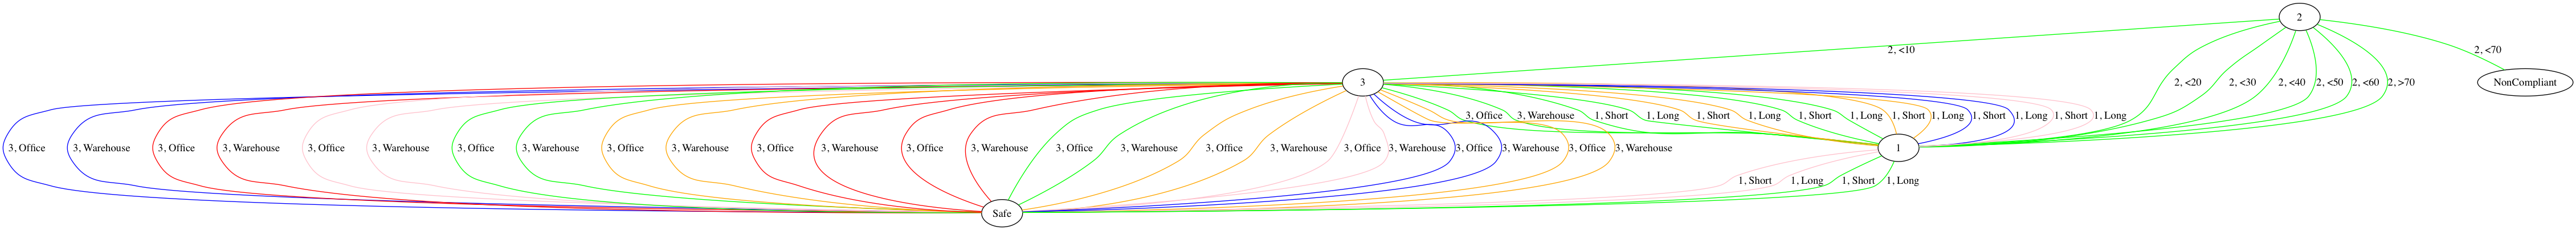

In [20]:
# g = make_graph(root)

g = make_graph(root)
png_str = g.create_png(prog='dot')
Image(png_str)

In [281]:
root.children[7].children

[Node: 1]

In [265]:
r = root.children[0].children[0]

In [264]:
r

Node: 1

In [262]:
for i, c in enumerate(r.children):
    print(i, c.value, c.children[0].value)

0 Short 3
1 Long 3


In [243]:
r = root.children[3].children[0]

In [244]:
r

Node: 1

In [245]:
for c in r.children:
    print(c.value, end=' - ')
    print(c.children[0].value)

Short - 3
Long - 3


In [67]:
def make_graph_helper(root, graph):
    for c in root.children:  # branch
        edge = pydot.Edge(str(root.value), '{}_{}'.format(c.value, root.value))
        graph.add_edge(edge)
        if c.children:
            make_graph_helper(c, graph)
            
def make_graph(root):
    graph = pydot.Dot(graph_type='graph')
    make_graph_helper(root, graph)
    return graph

g = make_graph(root)

In [70]:
from IPython.display import Image

png_str = g.create_png(prog='dot')

Image(png_str)

In [83]:
p.write_png('example.png')

['dot', '-Tpng', '/var/folders/5z/pwgqsmnd0s3gwh979nyls0bw0000gp/T/tmpuackmw9z'] return code: 1

stdout, stderr:
 b''
b"Error: /var/folders/5z/pwgqsmnd0s3gwh979nyls0bw0000gp/T/tmpuackmw9z: syntax error in line 2 near ';'\n"



AssertionError: 1

In [70]:
def make_graph(root):
    G=nx.Graph()
    
    print(root, end="\n\n")
    G.add_node(root)
    
    for c in root.children:  # branch
        if c.children:
            G.add_node
            
            
            print(c.children[0]) # node
            display(c)

In [14]:
G.add_node(n1)
G.add_node(n2)

In [15]:
G.add_edge(n1, n2)

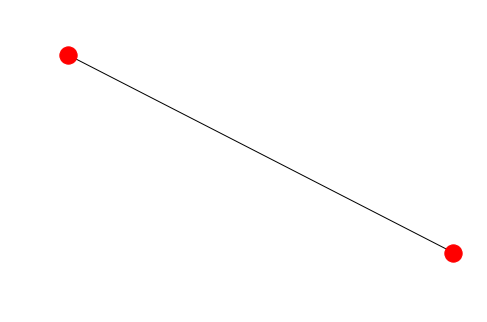

In [17]:
nx.draw(G)

In [108]:
G=nx.Graph()

In [109]:
G.add_node(root.value)

In [110]:
 H=nx.path_graph(10)

In [111]:
import matplotlib.pyplot as plt

/Users/dustymichels/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/dustymichels/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/dustymichels/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/dustymichels/miniconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 

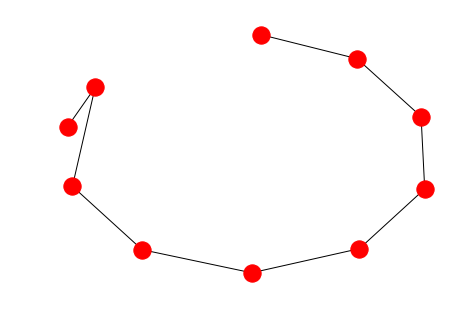

In [114]:
nx.draw(H)

In [104]:
def display_node(n):
    print("\t\t\t <{}>".format(n.value))
    for c in n.children:
        print(c.value, end='')
        print("|", end='\t')
    print()
    [display_node(c) for c in n.children]

In [105]:
display_node(root)

			 <2>
<10|	<20|	<30|	<40|	<50|	<60|	<70|	>70|	
			 <<10>
3|	
			 <3>
Office|	Warehouse|	
			 <Office>
1|	
			 <1>
Short|	Long|	
			 <Short>
Safe|	
			 <Safe>

			 <Long>
Safe|	
			 <Safe>

			 <Warehouse>
1|	
			 <1>
Short|	Long|	
			 <Short>
Safe|	
			 <Safe>

			 <Long>
Safe|	
			 <Safe>

			 <<20>
1|	
			 <1>
Short|	Long|	
			 <Short>
3|	
			 <3>
Office|	Warehouse|	
			 <Office>
Safe|	
			 <Safe>

			 <Warehouse>
Safe|	
			 <Safe>

			 <Long>
3|	
			 <3>
Office|	Warehouse|	
			 <Office>
Safe|	
			 <Safe>

			 <Warehouse>
Safe|	
			 <Safe>

			 <<30>
1|	
			 <1>
Short|	Long|	
			 <Short>
3|	
			 <3>
Office|	Warehouse|	
			 <Office>
Safe|	
			 <Safe>

			 <Warehouse>
Safe|	
			 <Safe>

			 <Long>
3|	
			 <3>
Office|	Warehouse|	
			 <Office>
Safe|	
			 <Safe>

			 <Warehouse>
Safe|	
			 <Safe>

			 <<40>
1|	
			 <1>
Short|	Long|	
			 <Short>
3|	
			 <3>
Office|	Warehouse|	
			 <Office>
Safe|	
			 <Safe>

			 <Warehouse>
Safe|	
			 <Safe>

			 <Long>
3|	
			 <3>
Office|	Warehouse|	
		

In [90]:
root.children[0]

Node: <10

In [91]:
display_node(root.children[0])

			 <<10>
3|	

In [12]:
categories[2]

['<10', '<20', '<30', '<40', '<50', '<60', '<70', '>70']

In [8]:
root.value

2

In [9]:
root.children

[<10, <20, <30, <40, <50, <60, <70, >70]

In [37]:
from dec_tree import *

In [40]:
e = calculate_entropy(learning_data)
e

0.6910143378800977

In [48]:
next_col = find_next_column(learning_data, e)
next_col

2

In [49]:
root = Node(next_col)

In [46]:
root

In [47]:
categories

[0,
 ['Short', 'Long'],
 ['<10', '<20', '<30', '<40', '<50', '<60', '<70', '>70'],
 ['Office', 'Warehouse']]

In [36]:
root

In [ ]:
make_decision_tree(learning_data)

## Data Validadation

In [5]:
import random

In [ ]:
random.randint()